In [174]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

Supongamos que nos dan esta serie de puntos

In [175]:
N_SAMPLES = 20
x = np.linspace(0,1,num=N_SAMPLES).reshape(-1,1)
t =  4 * x+ np.sin(x*6)+ 0.5*np.random.randn(N_SAMPLES,1)

In [176]:
x,t

(array([[0.        ],
        [0.05263158],
        [0.10526316],
        [0.15789474],
        [0.21052632],
        [0.26315789],
        [0.31578947],
        [0.36842105],
        [0.42105263],
        [0.47368421],
        [0.52631579],
        [0.57894737],
        [0.63157895],
        [0.68421053],
        [0.73684211],
        [0.78947368],
        [0.84210526],
        [0.89473684],
        [0.94736842],
        [1.        ]]),
 array([[0.24835708],
        [0.45196117],
        [1.33531676],
        [2.20497582],
        [1.67807991],
        [1.93552988],
        [3.0007528 ],
        [2.65965855],
        [2.02665797],
        [2.46104732],
        [1.85725295],
        [1.75690358],
        [2.04379875],
        [0.95891083],
        [1.12704862],
        [1.87704993],
        [1.91933176],
        [2.94365223],
        [2.77166562],
        [3.01443265]]))

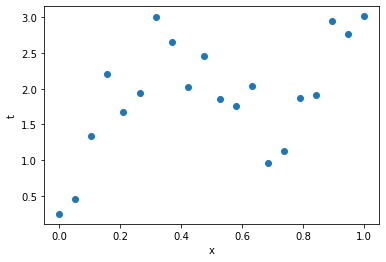

In [177]:
plt.scatter(x,t)
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Por supuesto, antes de seguir dividimos en entrenamiento y testeo

In [178]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, random_state=42)


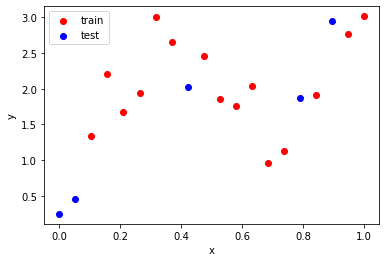

In [179]:
plt.scatter(x_train,t_train, c='red', label='train')
plt.scatter(x_test,t_test, c='blue', label='test')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Como vimos, la idea de Regresion Lineal es modelar

$$y(x,w)=w_{0}+w_{1}x$$

De manera tal que 

$$t\sim \mathcal{N}(y(x,w),\sigma^{2})$$

Con alguna incerteza que no nos importa demasiado hoy.

Aca tenemos la gran ventaja de que sabemos la verdadera funcion que sigue el target. En la vida real, casi nunca sabemos la verdadera funcion.

In [180]:
def y_true(x):
  return  4 * x+ np.sin(x*6)

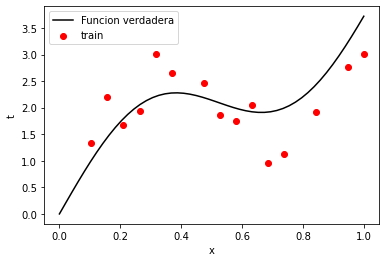

In [181]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x_train,t_train, c='red', label='train')
plt.plot(xvals,y_true(xvals),color='black',label='Funcion verdadera')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Veamos los shapes que tenemos

In [182]:
print(x_train.shape,t_train.shape)

(15, 1) (15, 1)


# Regresion Lineal a mano

Si queremos obtener los estimador de maxima verosimilitud de los pesos $w_{0}$, $w_{1}$, tenemos que resolver las ecuaciones normales

$$w_{ML}=(\Phi^{T}\Phi)^{-1}\Phi^{T}t$$

Donde $w_{ML}=(w_{0,ML},w_{1,ML})^{T}$, $t$ el vector de target y $\Phi$ es la matriz de diseño. En cada columna, tiene una de las funciones de base. En este caso, 1 y x. En cada fila, tiene una medicion

Si tenemos M funciones de base y N mediciones, 

$w_{ML}$ es una matriz de N

$\Phi$ es una matriz de M x N 

$t$ es una matriz de N

In [183]:
Phi_train=np.vstack([np.ones(len(x_train)),x_train[:,0]]).T # agrupo 1s y xs para cada medicion

In [184]:
x_train[:,0].shape

(15,)

In [185]:
Phi_train

array([[1.        , 0.26315789],
       [1.        , 0.57894737],
       [1.        , 0.15789474],
       [1.        , 0.94736842],
       [1.        , 0.84210526],
       [1.        , 0.68421053],
       [1.        , 0.10526316],
       [1.        , 0.47368421],
       [1.        , 1.        ],
       [1.        , 0.21052632],
       [1.        , 0.63157895],
       [1.        , 0.36842105],
       [1.        , 0.52631579],
       [1.        , 0.73684211],
       [1.        , 0.31578947]])

Que shape tiene que tener?

In [186]:
Phi_train.shape

(15, 2)

Las ecuaciones normales tienen una inversa ahi metida. Eso no es numericamente muy deseable. Conviene resolver la ecuacion

$$(\Phi^{T}\Phi)w_{ML}=\Phi^{T}t$$

y utilizar `np.linalg.solve(A,b)` que obtiene el vector $X$ solucion de la ecuacion

$$Ax=b$$



In [187]:
A = Phi_train.T @ Phi_train
b = Phi_train.T @ t_train

wML= np.linalg.solve(A,b)

Veamos la solucion

In [188]:
wML

array([[1.85999881],
       [0.36019965]])

Podemos graficar esta solucion facilmente

In [189]:
def y_ML(x,wML):
  return wML[0]+wML[1]*x

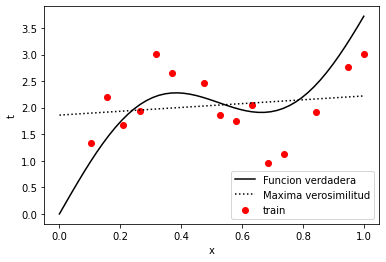

In [190]:
xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x_train,t_train, c='red', label='train')
plt.plot(xvals,y_true(xvals),color='black',label='Funcion verdadera')
plt.plot(xvals,y_ML(xvals,wML),color='black',linestyle='dotted',label='Maxima verosimilitud')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()

Obviamente, no funciona muy bien...

## Ejercicio

Resuelvan las ecuaciones normales, pero ahora modelando la funcion como

$$y(x,w)=w_{0}+\sum_{i=1}^{5}w_{i}x^{i}$$

In [191]:

wML,x




(array([[1.85999881],
        [0.36019965]]),
 array([[0.        ],
        [0.05263158],
        [0.10526316],
        [0.15789474],
        [0.21052632],
        [0.26315789],
        [0.31578947],
        [0.36842105],
        [0.42105263],
        [0.47368421],
        [0.52631579],
        [0.57894737],
        [0.63157895],
        [0.68421053],
        [0.73684211],
        [0.78947368],
        [0.84210526],
        [0.89473684],
        [0.94736842],
        [1.        ]]))

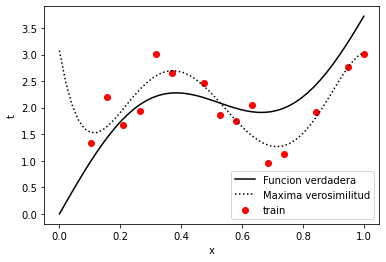

In [192]:
Phi_train = np.array([np.array([val**j for val in x_train])[:,0] for j in range(6)]).T
A = Phi_train.T @ Phi_train
b = Phi_train.T @ t_train

wML= np.linalg.solve(A,b)


def y_ML(x,wML):
  return [np.sum([wML[i]*xi**i for i in range(6)]) for xi in x]

pru = y_ML(x_train, wML)




xvals=np.linspace(0,1,num=50).reshape(-1,1)
plt.scatter(x_train,t_train, c='red', label='train')
plt.plot(xvals,y_true(xvals),color='black',label='Funcion verdadera')
plt.plot(xvals,y_ML(xvals,wML),color='black',linestyle='dotted',label='Maxima verosimilitud')
plt.legend()
plt.xlabel('x')
plt.ylabel('t')
plt.show()



In [193]:
pru

[2.3368348121698346,
 1.7664169116839687,
 1.6500194482705217,
 2.752659712529038,
 1.810161932290299,
 1.2969163270614672,
 1.5279501702680987,
 2.41167359920533,
 3.038920875205605,
 1.9822852053255693,
 1.475382784012858,
 2.695474787022463,
 2.102683808162851,
 1.2825829236300095,
 2.5947424946658693]

# Hola `sklearn`!

Como ya vimos antes, `sklearn` resuelve las ecuaciones normales por nosotros utilizando `LinearRegression`

In [194]:
from sklearn.linear_model import LinearRegression

Veamos los parametros que tenemos:

In [215]:
LinearRegression??

SyntaxError: invalid syntax (<ipython-input-215-d134b79a8d67>, line 1)

La opcion con la que hay que tener mas cuidado ahora mismo en `fit_intercept`. Por defecto, esta como verdadera. 

In [196]:
lr=LinearRegression(fit_intercept=True)
lr.fit(x_train,t_train) #features, target

LinearRegression()

Podemos obtener tanto los coeficientes como el intercept

In [197]:
print(lr.intercept_,lr.coef_)

[1.85999881] [[0.36019965]]


Noten que tenemos 1 solo coeficiente. El $w_{0}$ es el intercept.

Supongamos que no nos damos cuenta y le damos la matriz $\Phi$

In [198]:
lr=LinearRegression(fit_intercept=True)
lr.fit(Phi_train,t_train) #features, target

LinearRegression()

In [199]:
print(lr.intercept_,lr.coef_)

[3.07455312] [[   0.          -33.29841561  231.85595838 -584.70043884  604.71681952
  -218.60955569]]


Aparece el coeficiente que deberia ser el `intercept` como cero. 

Hay que tener cuidado con esto, en particular cuando queremos aprovechar `sklearn` para hacer regresion polinomial

In [200]:
from sklearn.preprocessing import PolynomialFeatures # utilizo esto para convertir mi X es a la base que quiero

In [202]:
PolynomialFeatures(degree=1).fit_transform(x_train)

array([[1.        , 0.26315789],
       [1.        , 0.57894737],
       [1.        , 0.15789474],
       [1.        , 0.94736842],
       [1.        , 0.84210526],
       [1.        , 0.68421053],
       [1.        , 0.10526316],
       [1.        , 0.47368421],
       [1.        , 1.        ],
       [1.        , 0.21052632],
       [1.        , 0.63157895],
       [1.        , 0.36842105],
       [1.        , 0.52631579],
       [1.        , 0.73684211],
       [1.        , 0.31578947]])

In [203]:
PolynomialFeatures(degree=1,include_bias=False).fit_transform(x_train)

array([[0.26315789],
       [0.57894737],
       [0.15789474],
       [0.94736842],
       [0.84210526],
       [0.68421053],
       [0.10526316],
       [0.47368421],
       [1.        ],
       [0.21052632],
       [0.63157895],
       [0.36842105],
       [0.52631579],
       [0.73684211],
       [0.31578947]])

Tenemos dos opciones: `PolynomialFeatures` con `include_bias=True` y `LinearRegression` con `fit_intercept=False` o el opuesto 

Podemos combinar ambos utilizando el `Pipeline`

In [204]:
from sklearn.pipeline import Pipeline
Pipeline?

Init signature: Pipeline(steps, *, memory=None, verbose=False)
Docstring:     
Pipeline of transforms with a final estimator.

Sequentially apply a list of transforms and a final estimator.
Intermediate steps of the pipeline must be 'transforms', that is, they
must implement fit and transform methods.
The final estimator only needs to implement fit.
The transformers in the pipeline can be cached using ``memory`` argument.

The purpose of the pipeline is to assemble several steps that can be
cross-validated together while setting different parameters.
For this, it enables setting parameters of the various steps using their
names and the parameter name separated by a '__', as in the example below.
A step's estimator may be replaced entirely by setting the parameter
with its name to another estimator, or a transformer removed by setting
it to 'passthrough' or ``None``.

Read more in the :ref:`User Guide <pipeline>`.

.. versionadded:: 0.5

Parameters
----------
steps : list
    List of (n

In [205]:
degree=5
modelo=Pipeline([['poly',PolynomialFeatures(degree=degree,include_bias=True)],['regressor',LinearRegression(fit_intercept=False)]])

In [206]:
modelo.fit(x_train,t_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ['regressor', LinearRegression(fit_intercept=False)]])

Podemos ver los coeficientes con

In [207]:
modelo['regressor'].coef_

array([[   3.07455312,  -33.29841561,  231.85595838, -584.70043884,
         604.71681952, -218.60955569]])

In [213]:
modelo['poly'].

PolynomialFeatures(degree=5)

Y verificar que no hay intercept

In [208]:
modelo['regressor'].intercept_

0.0

In [228]:
np.append(deg_prueba[1]['coef'],deg_prueba[1]['int'])

array([1.85999881, 0.36019965, 0.        ])

## Ejercicios:

1.   Utilicen este Pipeline para loopear sobre grados, con que se encuentran?
2.   Utilicen las funciones de base mas adecuadas: [1,x,sin(6x)]. Que encuentra?

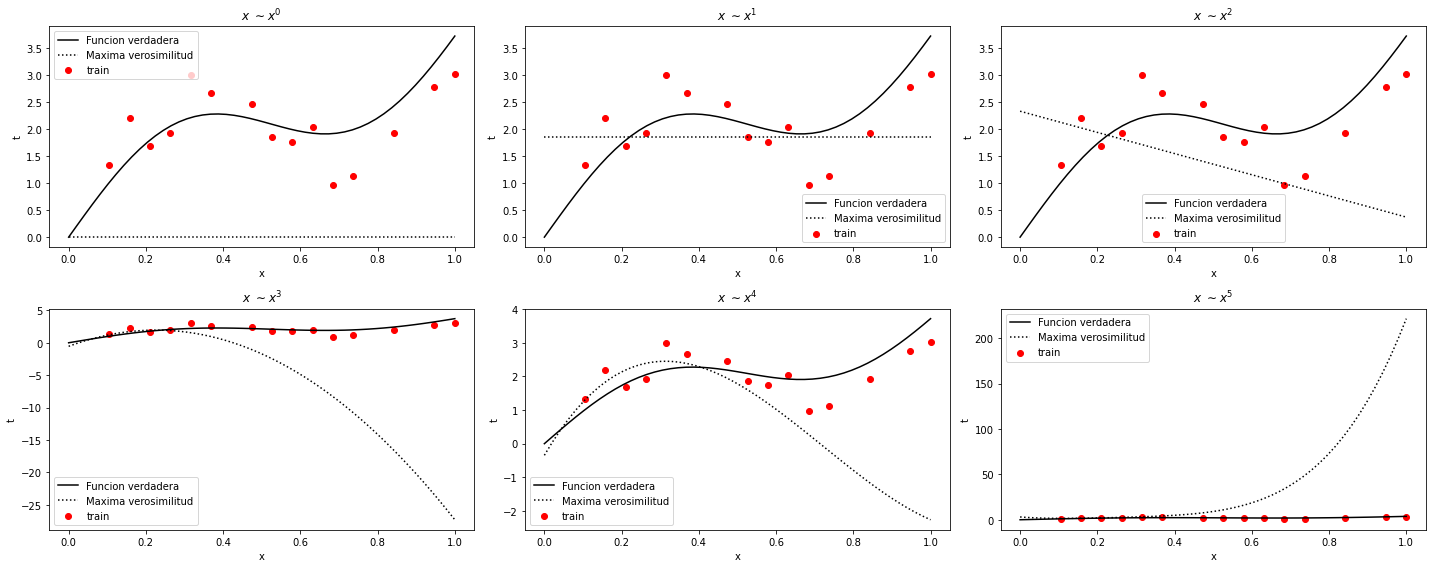

In [245]:
def y_ML(x,wML, deg ):
  return [np.sum([wML[i]*xi**i for i in range(deg)]) for xi in x]

deg_prueba = {}
for degree in range(6):
    modelo=Pipeline([['poly',PolynomialFeatures(degree=degree,include_bias=True)],['regressor',LinearRegression(fit_intercept=False)]])
    modelo.fit(x_train, t_train)
    deg_prueba.update({
        degree:
        {
            'coef': modelo['regressor'].coef_,
            'int' : modelo['regressor'].intercept_,
        
        }
    }
    )
deg_prueba
fig = plt.figure(figsize = (20,8))
for k,v in deg_prueba.items():
    ax = plt.subplot(2, 3, k + 1)
    ax.scatter(x_train,t_train, c='red', label='train')
    ax.plot(xvals,y_true(xvals),color='black',label='Funcion verdadera')
    ax.plot(xvals,y_ML(xvals,np.append(deg_prueba[k]['coef'],deg_prueba[k]['int']).T,k),color='black',linestyle='dotted',label='Maxima verosimilitud')
    ax.legend()
    ax.set_title(rf'$x \ \sim x^{k:d}$') 
    ax.set_xlabel('x')
    ax.set_ylabel('t')
plt.tight_layout()
plt.show()
